# learning a latent space of wine

<img src="https://images.crateandbarrel.com/is/image/Crate/VivRedWine22ozSHF15/?$web_product_hero$&190411135544&wid=625&hei=625" width=150>

In [1]:
using CSV
using DataFrames
using PyPlot
using Random
using StatsBase
using LaTeXStrings
using Statistics
using LinearAlgebra
using PyCall
seaborn = pyimport("seaborn")

# (optional) change the style. see styles here: https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html
PyPlot.matplotlib.style.use("seaborn-dark")                                    
                                                                                  
# (optional) change settings for all plots at once, e.g. I like larger font size                           
rcParams = PyPlot.PyDict(PyPlot.matplotlib.rcParams)                           
rcParams["font.size"] = 16;

## read in data on wines
source: [UCI machine learning repository](https://archive.ics.uci.edu/ml/datasets/Wine)



In [2]:
df = CSV.read("wines.csv")
println("# wines: ", nrow(df))
first(df, 6)

# wines: 50


,class,total_phenols,flavanoids
,Int64,Float64,Float64
1,1,2.98,3.15
2,1,2.7,2.98
3,2,2.0,2.09
4,1,3.0,3.23
5,2,2.2,2.21
6,2,1.61,1.57


## visualize relationship between phenol and flavanoid content

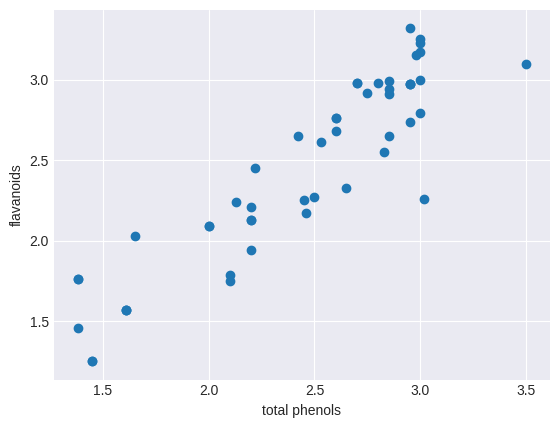

In [3]:
figure()
scatter(df[:, :total_phenols], df[:, :flavanoids])
xlabel("total phenols")
ylabel("flavanoids")
grid("on")

## construct the data matrix
* each row corresponds to a wine
* first column: total phenols
* second column: flavanoids

In [4]:
data_matrix = zeros(nrow(df), 2)
for (i, row) in enumerate(eachrow(df))
    data_matrix[i, 1] = row[:total_phenols]
    data_matrix[i, 2] = row[:flavanoids]
end
data_matrix

50×2 Array{Float64,2}:
 2.98  3.15
 2.7   2.98
 2.0   2.09
 3.0   3.23
 2.2   2.21
 1.61  1.57
 2.65  2.33
 2.22  2.45
 2.85  2.94
 2.13  2.24
 2.1   1.79
 3.0   3.25
 2.2   1.94
 ⋮         
 1.38  1.76
 2.95  2.97
 1.38  1.46
 3.0   2.79
 1.38  1.76
 2.6   2.76
 2.45  2.25
 3.5   3.1 
 2.42  2.65
 2.2   2.13
 2.95  3.32
 2.85  2.65

## center the data

subtract from each row the mean "wine vector" = row

In [5]:
data_mean = mean(data_matrix, dims=1)[:]

2-element Array{Float64,1}:
 2.4422            
 2.4467999999999996

In [6]:
for i = 1:size(data_matrix)[1]
    data_matrix[i, :] = data_matrix[i, :] .- data_mean
end

now the mean wine vector should be zero.

In [7]:
mean(data_matrix, dims=1)[:]

2-element Array{Float64,1}:
 -9.769962616701378e-17
  3.552713678800501e-16

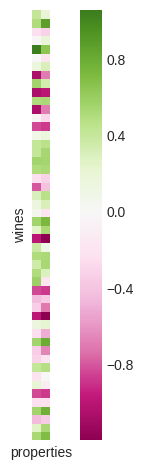

In [8]:
seaborn.heatmap(data_matrix, square=true, cbar=true, cmap="PiYG", center=0.0)
xticks([])
yticks([])
ylim([-0.0, 50.])
xlabel("properties")
ylabel("wines")
tight_layout()

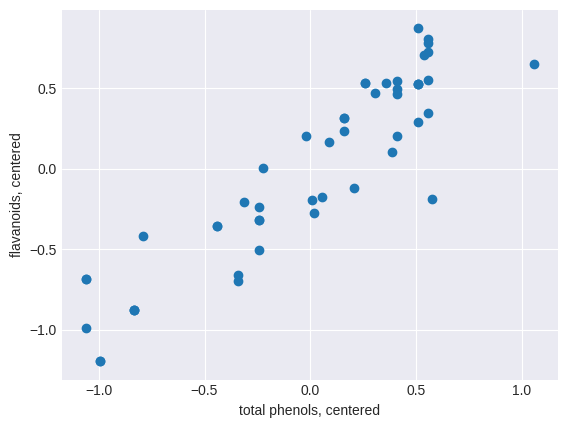

In [9]:
figure()
xlabel("total phenols, centered")
ylabel("flavanoids, centered")
scatter(data_matrix[:, 1], data_matrix[:, 2])
grid("on")

## what's the rank of the data matrix?

In [10]:
rank(data_matrix)

2

## the singular value decomposition of the centered data matrix, $A$

$A=U\Sigma V^T$.

* number of wines: $w$
* number of features (flavanoids, phenols): 2


$A$ is the $w \times 2$ centered data matrix

In [11]:
the_svd = svd(data_matrix)

SVD{Float64,Float64,Array{Float64,2}}([-0.16131734782924503 -0.08313721115251738; -0.10329892750888724 -0.15499846215492766; … ; -0.18002480529879944 -0.20134430997711997; -0.07862109299915475 0.13072549357672944], [5.454127993953091, 1.1779787033632005], [-0.6916355579155331 -0.7222466718697078; 0.7222466718697078 -0.6916355579155331])

$U$, $w\times 2$ matrix with orthogonal columns

In [12]:
the_svd.U

50×2 Array{Float64,2}:
 -0.161317   -0.0831372 
 -0.103299   -0.154998  
  0.103323   -0.0616326 
 -0.174447   -0.117846  
  0.0620708  -0.00946438
  0.221639    0.00456067
 -0.0108841   0.195985  
  0.0277533  -0.138115  
 -0.117023   -0.0395444 
  0.0669748  -0.0699972 
  0.130369    0.175821  
 -0.177096   -0.129588  
  0.0978248   0.149063  
  ⋮                     
  0.225645   -0.248014  
 -0.133677    0.00415384
  0.265371   -0.0718726 
 -0.116182    0.140495  
  0.225645   -0.248014  
 -0.0614851  -0.0871406 
  0.0250715   0.120331  
 -0.220637    0.265044  
 -0.024093   -0.132918  
  0.0726646   0.0375066 
 -0.180025   -0.201344  
 -0.0786211   0.130725  

$\Sigma$, $2\times 2$ diagonal matrix 

singular values $\sigma_1$ and $\sigma_2$ run down the diagonal.

In [13]:
diagm(the_svd.S)

2×2 Array{Float64,2}:
 5.45413  0.0    
 0.0      1.17798

$V^T$, $2\times 2$ orthogonal matrix

In [14]:
the_svd.Vt

2×2 Array{Float64,2}:
 -0.691636  -0.722247
  0.722247  -0.691636

verify `svd` ^.^

In [15]:
@assert isapprox(data_matrix, the_svd.U * diagm(the_svd.S) * the_svd.Vt) # A = UΣVᵀ
@assert isapprox(the_svd.U' * the_svd.U, diagm(ones(2))) # UᵀU = I
@assert isapprox(the_svd.V' * the_svd.V, diagm(ones(2))) # VᵀV = I

## visualize eigenwines ($\mathbf{v}_1, \mathbf{v}_2$)

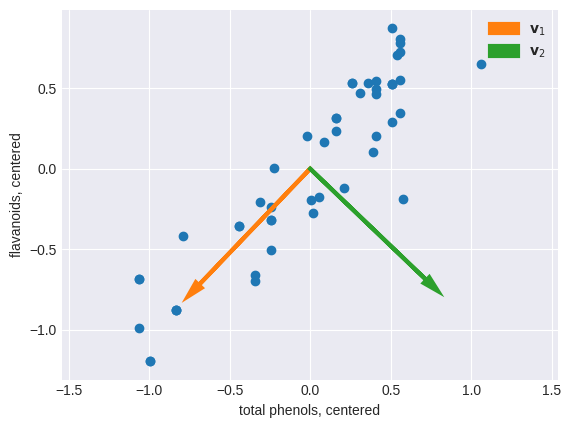

In [16]:
figure()
xlabel("total phenols, centered")
ylabel("flavanoids, centered")
scatter(data_matrix[:, 1], data_matrix[:, 2])
arrowz = []
for i = 1:2
    vσ = the_svd.V[:, i]
    ar = arrow(0, 0, vσ[1], vσ[2], head_width=0.05, head_length=0.1, 
        fc="C$i", ec="C$i", lw=3)
    push!(arrowz, ar)
end
axis("equal") # important to see orthogonality
legend(arrowz, [L"$\mathbf{v}_1$", L"$\mathbf{v}_2$"])
grid("on")

## the low rank approximation to the data matrix

zero out the smallest singular value!

In [17]:
data_matrix_low_rank = the_svd.U * diagm([the_svd.S[1], 0.0]) * the_svd.Vt

50×2 Array{Float64,2}:
  0.608532    0.635465 
  0.389671    0.406918 
 -0.389764   -0.407014 
  0.658062    0.687187 
 -0.234148   -0.244511 
 -0.83608    -0.873084 
  0.0410579   0.0428751
 -0.104693   -0.109327 
  0.441444    0.460982 
 -0.252647   -0.263829 
 -0.491787   -0.513553 
  0.668053    0.69762  
 -0.369021   -0.385354 
  ⋮                    
 -0.851192   -0.888865 
  0.504266    0.526584 
 -1.00105    -1.04536  
  0.438268    0.457666 
 -0.851192   -0.888865 
  0.231938    0.242204 
 -0.0945766  -0.0987625
  0.832303    0.86914  
  0.0908852   0.0949077
 -0.27411    -0.286242 
  0.679102    0.709158 
  0.29658     0.309706 

In [18]:
rank(data_matrix_low_rank)

1

## the low-rank approximation of the data is a projection onto $\mathbf{v}_1$

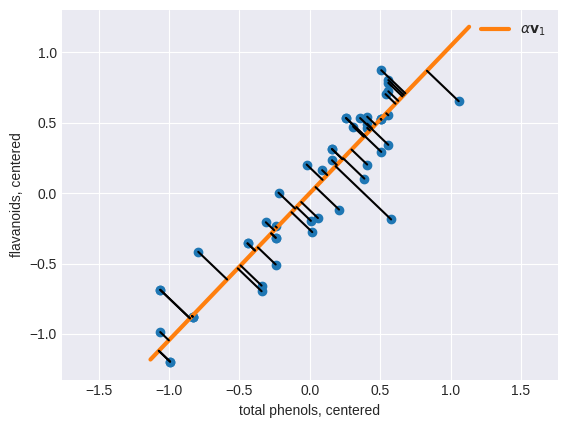

In [19]:
figure()
scatter(data_matrix[:, 1], data_matrix[:, 2])
xlabel("total phenols, centered")
ylabel("flavanoids, centered")
vσ = the_svd.V[:, 1] * the_svd.S[1] * 0.3
plot([-vσ[1], vσ[1]], [-vσ[2], vσ[2]], color="C1", 
    label="\$\\alpha\\mathbf{v}_1\$", lw=3)
for i = 1:nrow(df)
    plot([data_matrix[i, 1], data_matrix_low_rank[i, 1]], [data_matrix[i, 2], data_matrix_low_rank[i, 2]],
        color="k")
end
legend()
grid("on")
axis("equal"); # important to see orthogonality

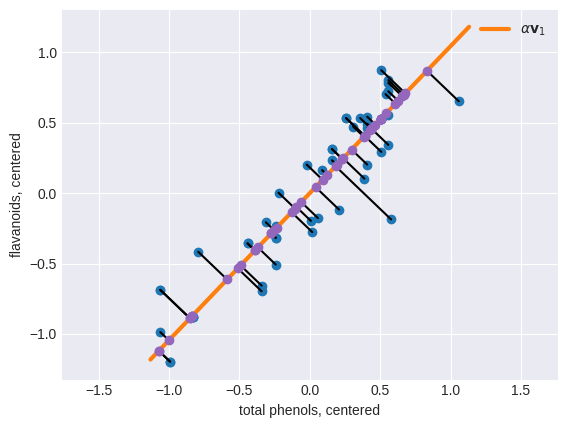

In [20]:
figure()
scatter(data_matrix[:, 1], data_matrix[:, 2])
xlabel("total phenols, centered")
ylabel("flavanoids, centered")
vσ = the_svd.V[:, 1] * the_svd.S[1] * 0.3
plot([-vσ[1], vσ[1]], [-vσ[2], vσ[2]], color="C1", 
    label="\$\\alpha\\mathbf{v}_1\$", lw=3)
for i = 1:nrow(df)
    plot([data_matrix[i, 1], data_matrix_low_rank[i, 1]], [data_matrix[i, 2], data_matrix_low_rank[i, 2]],
        color="k")
end
scatter(data_matrix_low_rank[:, 1], data_matrix_low_rank[:, 2], color="C4", zorder=23)
legend()
grid("on")
axis("equal"); # important to see orthogonality

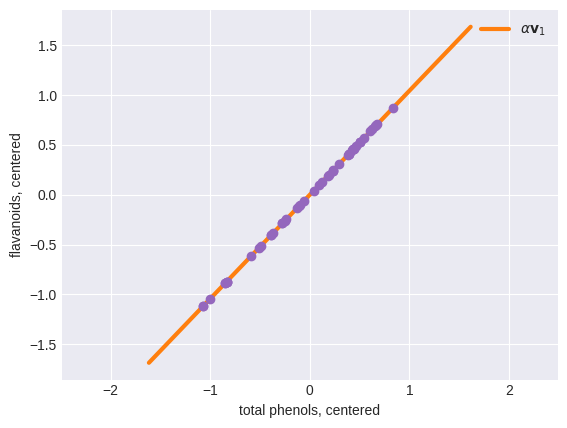

No handles with labels found to put in legend.


In [21]:
figure()
scatter(data_matrix_low_rank[:, 1], data_matrix_low_rank[:, 2], color="C4", zorder=23)
legend()
xlabel("total phenols, centered")
ylabel("flavanoids, centered")
for i = 1:1
    vσ = the_svd.V[:, i] * sqrt(the_svd.S[i])
    plot([-vσ[1], vσ[1]],
         [-vσ[2], vσ[2]], color="C$i", lw=3,
        label="\$\\alpha\\mathbf{v}_$i\$")
end
legend()
grid("on")
axis("equal"); # important to see orthogonality

## the latent representation of each wine

wine $i$ is approximately $\ell_i \mathbf{v}_1^T$.

=> its latent representation is $\ell_i$

In [23]:
ℓ = the_svd.U[:, 1] * the_svd.S[1]

50-element Array{Float64,1}:
 -0.8798454627057533 
 -0.563405572271553  
  0.5635388562333605 
 -0.9514579076136398 
  0.3385421440258887 
  1.2088449931926661 
 -0.05936345766046605
  0.15137023161884802
 -0.6382610390840946 
  0.3652892329238847 
  0.7110493020027193 
 -0.9659028410510341 
  0.5335487454307098 
  ⋮                  
  1.2306943038579947 
 -0.7290919950317393 
  1.447368305418907  
 -0.6336693719909684 
  1.2306943038579947 
 -0.33534774866866374
  0.13674338767221705
 -1.2033836192283442 
 -0.13140621433819985
  0.39632187777546535
 -0.9818783301861368 
 -0.4288095042418793 

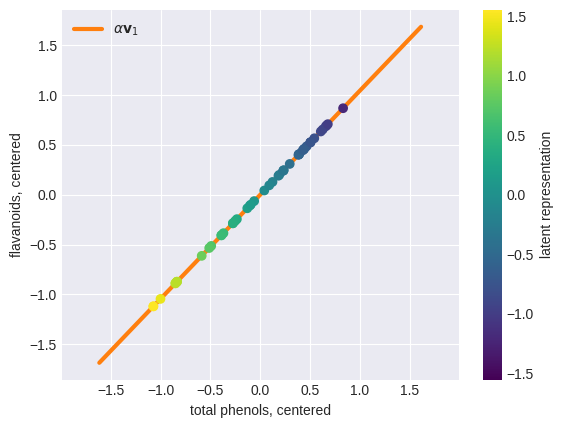

In [24]:
figure()
xlabel("total phenols, centered")
ylabel("flavanoids, centered")
for i = 1:1
    vσ = the_svd.V[:, i] * sqrt(the_svd.S[i])
    plot([-vσ[1], vσ[1]],
         [-vσ[2], vσ[2]], color="C$i", lw=3, label="\$\\alpha\\mathbf{v}_$i\$")
end
scatter(data_matrix_low_rank[:, 1], data_matrix_low_rank[:, 2], 
    c=ℓ, cmap="viridis", vmin=-maximum(abs.(ℓ)), vmax=maximum(abs.(ℓ)), zorder=100)
grid("on")
legend()
axis("equal") # important to see orthogonality
colorbar(label="latent representation");

## often the SVD captures hidden patterns in the data

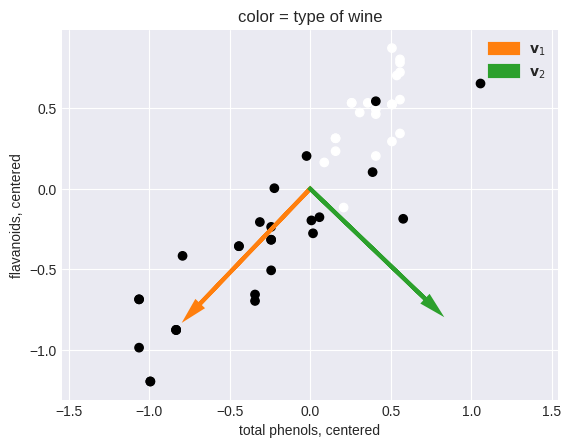

In [25]:
figure()
xlabel("total phenols, centered")
ylabel("flavanoids, centered")
scatter(data_matrix[:, 1], data_matrix[:, 2], c=df[:, :class])
arrowz = []
for i = 1:2
    vσ = the_svd.V[:, i]
    ar = arrow(0, 0, vσ[1], vσ[2], head_width=0.05, head_length=0.1, 
        fc="C$i", ec="C$i", label="\$\\mathbf{v}_$i\$", lw=3)
    push!(arrowz, ar)
end
grid("on")
axis("equal") # important to see orthogonality
legend(arrowz, [L"$\mathbf{v}_1$", L"$\mathbf{v}_2$"]);
title("color = type of wine");